# import Liberies

In [40]:
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import StratifiedKFold  


# Load Data

In [41]:
df = pd.read_csv("/home/ellah/Desktop/fruit_weight.csv/fruits_weight_sphercity.csv",sep=",")
df.columns 

Index(['Color', 'Weight', 'Sphericity', 'labels'], dtype='object')

# category

labels
apple     44
orange    25
dtype: int64

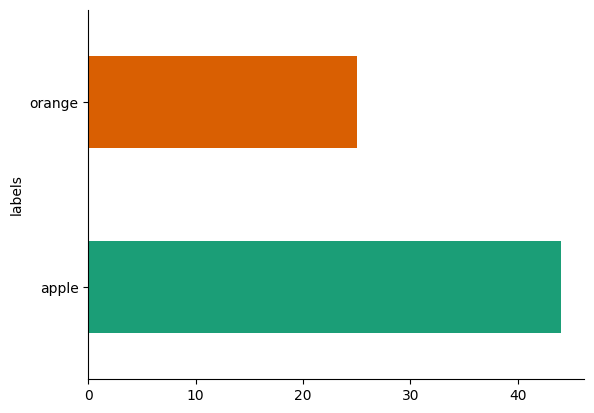

In [42]:
df.groupby('labels').size().plot(kind='barh', color=sns.color_palette('Dark2'))
plt.gca().spines[['top', 'right']].set_visible(False)

df.groupby('labels').size()

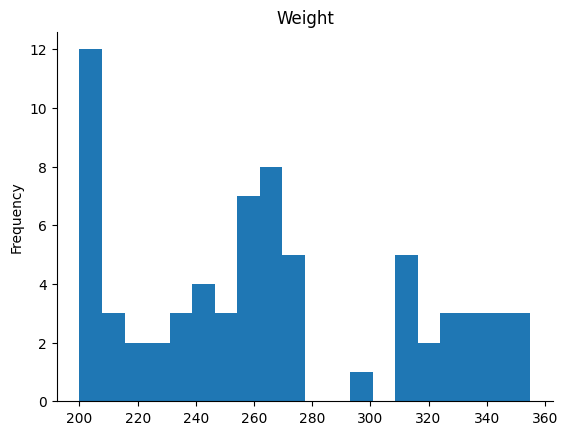

In [43]:
df['Weight'].plot(kind='hist', bins=20, title='Weight')
plt.gca().spines[['top', 'right',]].set_visible(False)

# explore Data

In [44]:
print (df.shape)

print (df.head(10))
print (df.tail())
print(df.describe())
print(df.groupby('labels').size())

(69, 4)
             Color  Weight  Sphericity  labels
0              Red     200        0.40   apple
1           Orange     320        1.00  orange
2           Orange     310        0.95  orange
3              Red     220        0.45   apple
4              Red     230        0.50   apple
5              Red     245        0.40   apple
6              Red     240        0.35   apple
7  Greenish yellow     330        0.98  orange
8  Greenish yellow     315        0.90  orange
9              Red     243        0.53   apple
   Color  Weight  Sphericity labels
64   Red     200        0.43  apple
65   Red     200        0.49  apple
66   Red     200        0.42  apple
67   Red     201        0.40  apple
68   Red     202        0.40  apple
           Weight  Sphericity
count   69.000000   69.000000
mean   264.144928    0.588159
std     48.105667    0.214391
min    200.000000    0.100000
25%    225.000000    0.420000
50%    260.000000    0.530000
75%    310.000000    0.730000
max    355.000000  

# visualization

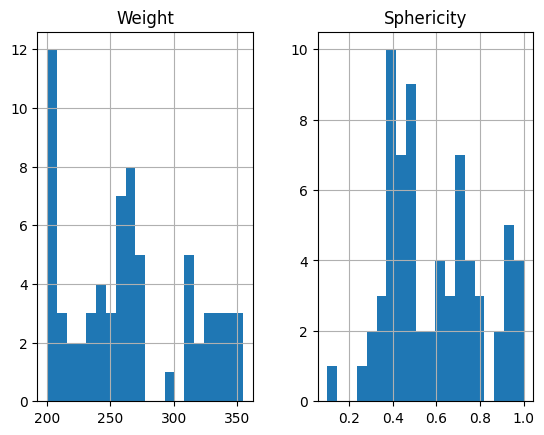

In [45]:
df.hist(bins=20)
plt.show()

# missing values

In [46]:
df.isnull().sum()

Color         0
Weight        0
Sphericity    0
labels        0
dtype: int64

# predicting Data

In [47]:
array = df.values
X = array[:,0:4]
y = array[:,2]

#print (X)
#print (y)

X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size=0.20, random_state=1)

In [48]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Print confirmation
print("Training data shape:", X_train.shape)
print("Test data shape:", X_test.shape)

Training data shape: (55, 4)
Test data shape: (14, 4)


# model creation and training

In [49]:
Y_train = Y_train.astype(int)

In [56]:
import pandas as pd

all_columns = ['Color', 'Weight', 'Sphericity', 'labels']

# Assuming X_train is a numpy array with 4 columns including labels
X_train_df = pd.DataFrame(X_train, columns=all_columns)

# Separate features and labels
X_train_features = X_train_df.drop('labels', axis=1)
Y_train = X_train_df['labels']

# Repeat for validation if needed
X_validation_df = pd.DataFrame(X_validation, columns=all_columns)
X_validation_features = X_validation_df.drop('labels', axis=1)
Y_validation = X_validation_df['labels']

# Now encode categorical features
X_train_encoded = pd.get_dummies(X_train_features, columns=['Color'])
X_validation_encoded = pd.get_dummies(X_validation_features, columns=['Color'])

# Align validation columns with training columns
X_validation_encoded = X_validation_encoded.reindex(columns=X_train_encoded.columns, fill_value=0)

# Now train model
model.fit(X_train_encoded, Y_train)

# Predict
predictions = model.predict(X_validation_encoded)


/home/ellah/ros2_env/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1264: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/home/ellah/ros2_env/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:470: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [73]:
Y_validation = Y_validation.astype(int)

print (Y_validation)
print (predictions)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))


[0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 1 0 0 0 0 0 0 0 1 0 0 1 1]
0.7142857142857143
[[10  4]
 [ 0  0]]
              precision    recall  f1-score   support

           0       1.00      0.71      0.83        14
           1       0.00      0.00      0.00         0

    accuracy                           0.71        14
   macro avg       0.50      0.36      0.42        14
weighted avg       1.00      0.71      0.83        14



/home/ellah/ros2_env/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1706: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/home/ellah/ros2_env/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1706: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/home/ellah/ros2_env/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1706: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
